In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import pi, sqrt
from scipy.special import erf 

def success_prob_calc(Δ):
    return (erf( (pi**0.5)/(2*Δ) )- erf(-(pi**0.5)/(2*Δ) )  )/2

## hadamard
$p_y = p_z$

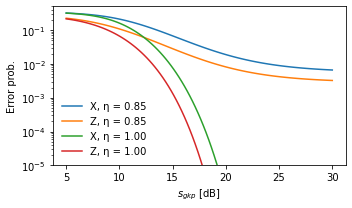

In [52]:
σ2_list = np.logspace(-3,-0.5,100)/2
η_list = [0.85,1]# np.array([0.75,0.85,0.95,1.0])
# η_list = np.array([0.75,0.85,0.95,1.0])

plt.figure(1,figsize=(5,3))

for i_n, η in enumerate(η_list):
    σm2 = (1-η)/(2*η)
    prob_X = np.zeros(len(σ2_list))
    prob_Z = np.zeros(len(σ2_list))

    for i_s, σgkp2 in enumerate(σ2_list):
        σc2 = σgkp2 # cz gate error
        σn = (2**0.5) * ( 3*σgkp2+ 11/3*σc2 + σm2)**0.5
        Xerr = 1-success_prob_calc(σn)
        σn = (2**0.5) * ( (3*σgkp2+ 11/3*σc2+ σgkp2+ 2*σc2)/2 + σm2)**0.5
        Yerr = 1-success_prob_calc(σn)
        prob_X[i_s] = Xerr*(1-Yerr)**3+ Yerr*(1-Xerr)*(1-Yerr)**2+ Yerr**2*(1-Xerr)*(1-Yerr)+ Xerr**3
        prob_Z[i_s] = Yerr*(1-Yerr)**2+ Yerr**2*(1-Yerr)
    plt.plot(-10*np.log10(2*σ2_list),prob_X,"-", color="C%d" % (2*i_n),label="X, η = %.2f" % (η))
    plt.plot(-10*np.log10(2*σ2_list),prob_Z,"-", color="C%d" % (2*i_n+1),label="Z, η = %.2f" % (η))

plt.yscale("log")
# plt.xscale("log")
plt.ylim(1e-5,5e-1)
# plt.xlim(4,31)
plt.xlabel(r"$s_{gkp}$ [dB]")
plt.ylabel("Error prob.")
# plt.grid()
plt.legend(frameon=False,markerscale=2)
plt.tight_layout()
# plt.grid()
# plt.savefig("figs/hadamard_error.pdf")
plt.show()

## S gate
$p_x = p_y$

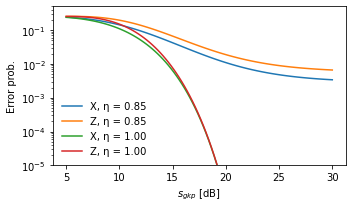

In [54]:
σ2_list = np.logspace(-3,-0.5,100)/2
η_list = [0.85,1]# np.array([0.75,0.85,0.95,1.0])
# η_list = np.array([0.75,0.85,0.95,1.0])

plt.figure(1,figsize=(5,3))

for i_n, η in enumerate(η_list):
    σm2 = (1-η)/(2*η)
    prob_X = np.zeros(len(σ2_list))
    prob_Z = np.zeros(len(σ2_list))

    for i_s, σgkp2 in enumerate(σ2_list):
        σc2 = σgkp2 # cz gate error
        σn = (2**0.5) * ( 3*σgkp2+ 11/3*σc2 + σm2)**0.5
        Xerr = 1-success_prob_calc(σn)
        σn = (2**0.5) * ( (3*σgkp2+ 11/3*σc2+ σgkp2+ 2*σc2)/2 + σm2)**0.5
        Yerr = 1-success_prob_calc(σn)
        prob_X[i_s] = Xerr*(1-Xerr)
        # prob_Z[i_s] = Xerr**2 *(Xerr*Yerr+(1-Xerr)*(1-Yerr))+ (1-Xerr)**2 *(Xerr*(1-Yerr)+Yerr*(1-Xerr))
        prob_Z[i_s] = Xerr+ Yerr -4*Xerr*Yerr-Xerr**2 *(1-4*Yerr)

    plt.plot(-10*np.log10(2*σ2_list),prob_X,"-", color="C%d" % (2*i_n),label="X, η = %.2f" % (η))
    plt.plot(-10*np.log10(2*σ2_list),prob_Z,"-", color="C%d" % (2*i_n+1),label="Z, η = %.2f" % (η))

plt.yscale("log")
# plt.xscale("log")
plt.ylim(1e-5,5e-1)
# plt.xlim(4,31)
plt.xlabel(r"$s_{gkp}$ [dB]")
plt.ylabel("Error prob.")
# plt.grid()
plt.legend(frameon=False,markerscale=2)
plt.tight_layout()
# plt.grid()
# plt.savefig("figs/sgate_error.pdf")
plt.show()

## cnot

In [33]:
def Hilbertspace_Zr(N,r):
    states=np.zeros((r**N,N),dtype=int)
    if N>0:
        for i_1 in range(r**N):
            num_str=np.base_repr(i_1,base=r)[::-1]
            for i_2 in range(len(num_str)):
                states[i_1,i_2]=int(num_str[i_2])
    else:
        states=[[0]]
    return states


def success_prob_calc(Δ):
    return (erf( (pi**0.5)/(2*Δ) )- erf(-(pi**0.5)/(2*Δ) )  )/2

def cnot_error_calc(σ2_list,σm2):
    Nq = 13
    vec = Hilbertspace_Zr(Nq,2)

    # qubits measured in X or Y basis
    X_list = [0,7,8,9,11,12]
    Y_list = [1,2,3,4,5,6,10]
    Nx = len(X_list)+1
    Ny = len(Y_list)+1

    err_vec = np.zeros((16,Ny*Nx),dtype=int)
    for i in range(2**Nq):
        s_flip=vec[i,:]

        sz_c = np.sum(vec[i,[0,2,3,4,6,7,9]])
        sx_c = np.sum(vec[i,[1,2,4,5]])
        sz_t = np.sum(vec[i,[7,9,11]])
        sx_t = np.sum(vec[i,[1,2,6,8,10,12]])
        px_exp = np.sum(vec[i,X_list])
        py_exp = np.sum(vec[i,Y_list])

        i_e = np.array([sz_c%2,sx_c%2,sz_t%2,sx_t%2])@ (2**np.arange(4))
        err_vec[i_e,py_exp*Nx + px_exp] += 1

    err_prob = np.zeros((16,len(σ2_list)))

    for i_s, σgkp2 in enumerate(σ2_list):
        σc2 = σgkp2 # cz gate error
        σn = (2**0.5) * ( 3*σgkp2+ 11/3*σc2 + σm2)**0.5
        Xerr = 1-success_prob_calc(σn)
        px_vec = Xerr**np.arange(Nx)*(1-Xerr)**np.arange(Nx-1,-1,-1)
        σn = (2**0.5) * ( (3*σgkp2+ 11/3*σc2+ σgkp2+ 2*σc2)/2 + σm2)**0.5
        Yerr = 1-success_prob_calc(σn)
        py_vec = Yerr**np.arange(Ny)*(1-Yerr)**np.arange(Ny-1,-1,-1)
        p_vec = np.kron(py_vec,px_vec)
        err_prob[:,i_s] = err_vec @ p_vec    
    return err_prob

In [49]:
σ2_list = np.logspace(-3,-0.5,100)/2
η_list = [0.8,1]# homodyne measurement efficiency
# η_list = np.array([0.75,0.85,0.95,1.0])

err_list={0: 'II', 1: 'ZI', 2: 'XI', 3: 'YI', 4: 'IZ', 5: 'ZZ', 6: 'XZ',\
          7: 'YZ', 8: 'IX', 9: 'ZX', 10: 'XX', 11: 'YX', 12: 'IY',\
          13: 'ZY', 14: 'XY', 15: 'YY'}

err_prob = np.zeros((len(η_list),16,len(σ2_list)))
for i_n, η in enumerate(η_list):
    σm2 = (1-η)/(2*η)
    err_prob[i_n,:,:] = cnot_error_calc(σ2_list,σm2) # note σc2 is defined inside this function


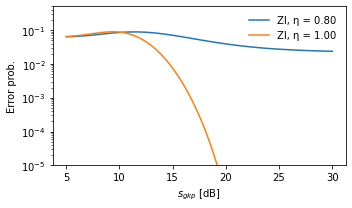

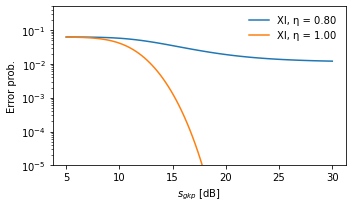

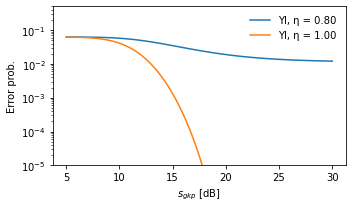

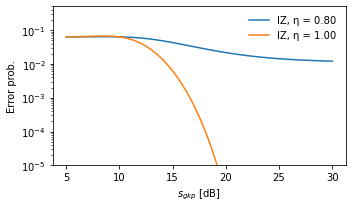

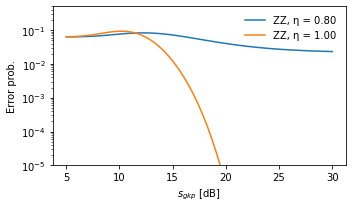

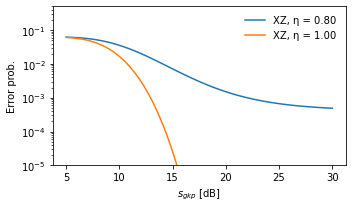

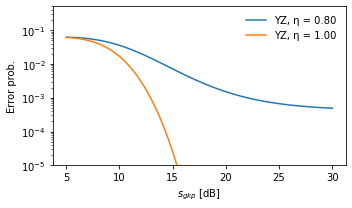

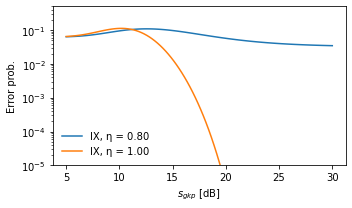

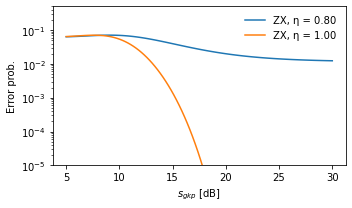

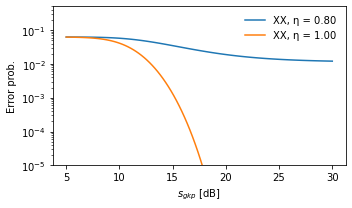

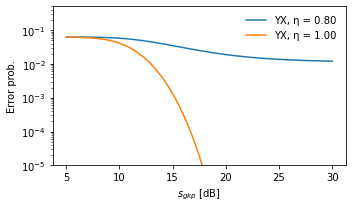

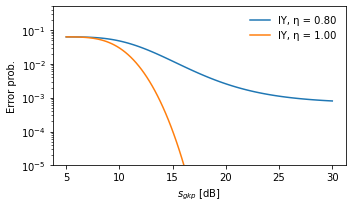

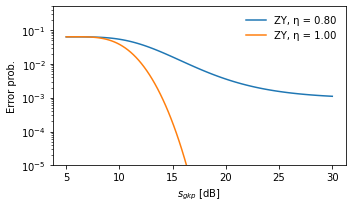

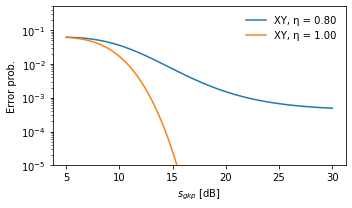

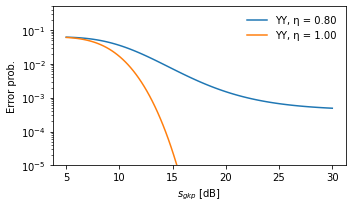

In [51]:
# plt.figure(1,figsize=(5,3))
# [Z_c,X_c,Z_t,X_t] # numbering scheme    
for i_xx in np.arange(1,16):
# for i_xx in [8,6]:
    plt.figure(i_xx,figsize=(5,3))
    for i_n, η in enumerate(η_list):
        plt.plot(-10*np.log10(2*σ2_list),err_prob[i_n,i_xx,:],"-", label=err_list[i_xx]+ ", η = %0.2f" % η)#, color="C%d" % (i_xx)

    plt.yscale("log")
    # plt.xscale("log")
    if i_xx>0:
        plt.ylim(1e-5,5e-1)
    else:
        plt.ylim(5e-2,2)
    # plt.xlim(4,31)
    plt.xlabel(r"$s_{gkp}$ [dB]")
    plt.ylabel("Error prob.")
    # plt.grid()
    plt.legend(frameon=False,markerscale=2)
    plt.tight_layout()
    # plt.grid()
    # plt.savefig("figs/cnot_err_%s.pdf" % err_list[i_xx])
    plt.show()